In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime
from operator import add

## Data Cleaning

In [3]:
usdf = pd.read_csv("USvideos.csv", encoding = "ISO-8859-1")
usdf.drop_duplicates(keep = 'first', inplace = True)
usdf2 = usdf.drop_duplicates(subset = "video_id", keep = 'first', inplace = False)

## Getting the unique tags

In [4]:
us_tags = list(usdf2["tags"])
for index in range(0, len(us_tags)):
    us_tags[index] = us_tags[index].split("|")
us_tags_dict = {}
for tags in us_tags:
    for index in range(len(tags)):
        tags[index] = tags[index].replace("\"", "")
        if tags[index] not in us_tags_dict:
            us_tags_dict[tags[index]] = 1
        else:
            us_tags_dict[tags[index]] += 1
uniquetags = us_tags_dict.keys()

## Getting average views, likes and dislikes per tag

In [5]:
us_tags_dict2 ={}
for index, row in usdf2.iterrows():
    coordinates = []
    coordinates.append(row['views'])
    coordinates.append(row['likes'])
    #coordinates.append(row['dislikes'])
    tagslist = row['tags'].split("|")
    for tag in tagslist:
        temp = tag.replace("\"", "")
        if temp not in us_tags_dict2 :
            us_tags_dict2[temp] = coordinates
        else:
            us_tags_dict2[temp] = list(map(add, us_tags_dict2[temp], coordinates))
            

for key in us_tags_dict2:
    for x in range(len(us_tags_dict2[key])):
        us_tags_dict2[key][x] /= us_tags_dict[key]
            
            
    

In [6]:
keys = us_tags_dict2.keys()
points = np.array([us_tags_dict2[key] for key in keys])
kmeans = KMeans(n_clusters =2, random_state = 0).fit(points)
prediction = kmeans.fit_predict(points)
print(prediction)

[0 0 0 ... 0 0 0]


## Visualizing the clusters

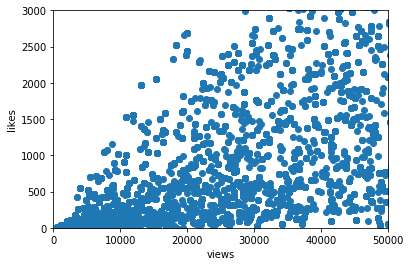

In [7]:
plt.scatter(points[:,0], points[:,1])
plt.axis([0,50000,0,3000])
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

##### TENTATIVE ANALYSIS

Initially we thought we could use clustering to see if any tags can be grouped together for one topic in trending videos. For example, tags such as president, Trump, Donald Trump and White House would be grouped together. We decided to use average views and likes for each tag as a metric for our cluster because we thought videos with similar topics are likely to have similar tags. Uppon looking at the scatterplot there are two possible conclusions we can make. 1. Many tags can be used for a wide range of topics making them difficult to cluster into just one type of topic and 2. The data that we had was not strong enough to make this type of analysis. 